In [2]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [76]:
def V2(a, b):
    V = [[a, b],
         [b, a]]
    return V

def V3():
    V = [[1., 0.7, 0.2],
         [0.7, 1., 0.5],
         [0.2, 0.5, 1.]]
    return V


def W(V, nu):
    rand_u = lambda V: np.random.multivariate_normal(np.zeros(len(V)), V).reshape(-1,1)
    U = [rand_u(V) for _ in range(nu)]
    
    S = sum( [u*u.T for u in U] )
    return S

def sig_x_roh(V, nu, it=10000):
    sig_x = []
    roh = []

    for i in range(it):
        S = W(V, nu)
        roh.append( S[1,0]/np.sqrt(S[0,0]*S[1,1]) )
        sig_x.append( np.sqrt(S[0,0]) )

    return sig_x, roh

i=0
i=1
i=2
i=3


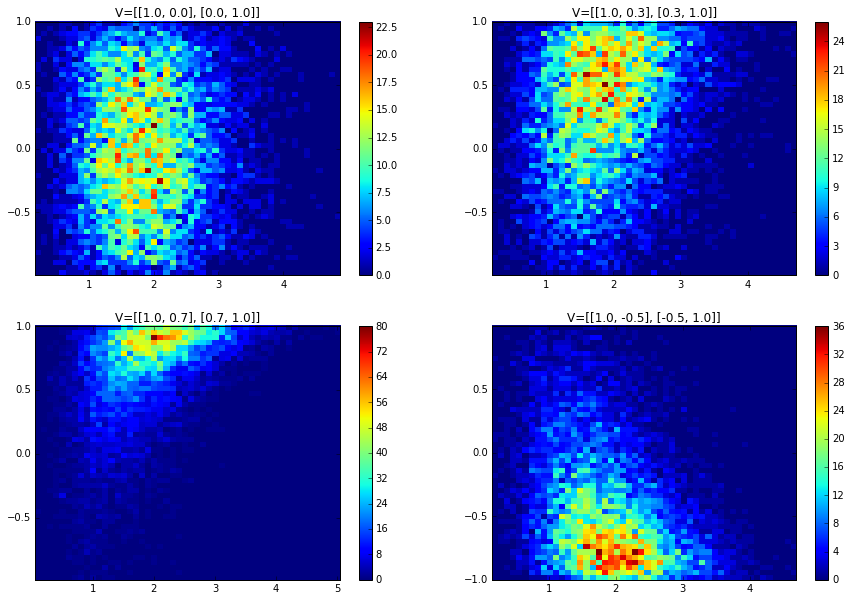

In [79]:
fig = plt.figure(figsize=(15,10))

Vs = [V2(1., a) for a in [0., .3, .7, -.5]]
nu = 4

for i in range(4):
    print("i={}".format(i))
    V = Vs[i]
    sig_x, roh = sig_x_roh(V, nu)
    
    ax = fig.add_subplot(2,2,i+1)
    _ = plt.hist2d(sig_x, roh, (50,50))
    ax.set_title("V={}".format(V))
    plt.colorbar()
plt.show()